# Introduction

The purpose of this project is to find the optimal allocations given my current financial portfolio and assuming long positions only. This is a simple project meant to demonstrate understanding of basic financial concepts. This is for educational purposes only and not financial advice.

I will be using the book <i>Python for Finance</i> by Yves Hilpisch as a rough guide for my analysis. However, changes will be made due to using a simplified version of my own portfolio and updated code.

In [1]:
### Import libraries
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [6]:
stocks = ['NVDA', 'AAPL', 'QYLD', '^GSPC']

In [35]:
# get stock data
stocks_df = pdr.get_data_yahoo(stocks, start='2021-01-01', end='2023-12-08')[['Adj Close']]
stocks_df.columns = stocks_df.columns.droplevel(0)

[*********************100%%**********************]  4 of 4 completed


### Exploratory Analysis

In [36]:
for stock in stocks_df.columns:
    stocks_df[stock + "_LogRet"] = np.log(stocks_df[stock] / stocks_df[stock].shift(1))
    stocks_df[stock + '_Volatility'] = stocks_df[stock + '_LogRet'].rolling(252).std()

In [40]:
vols = [vol_col for vol_col in stocks_df.columns if '_Vol' in vol_col]

<Axes: xlabel='Date'>

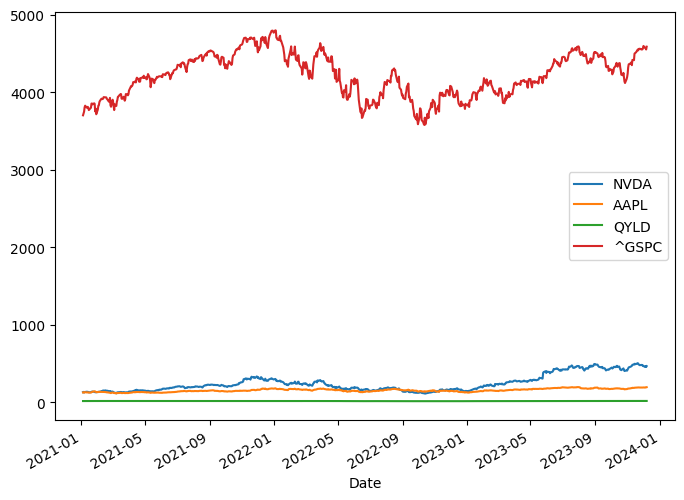

In [47]:
stocks_df[stocks].plot(figsize=(8,6))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

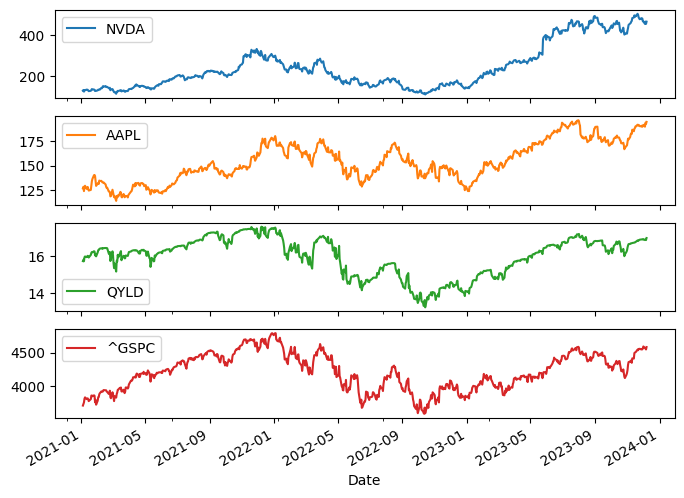

In [48]:
stocks_df[stocks].plot(subplots=True,figsize=(8,6))

<Axes: xlabel='Date'>

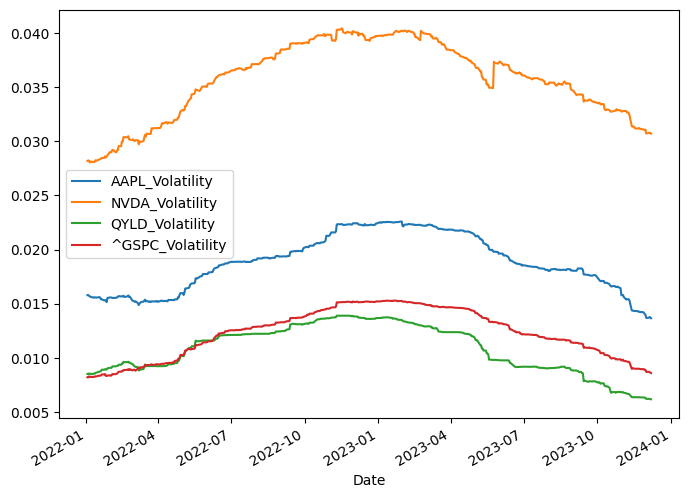

In [49]:
stocks_df[vols].plot(figsize=(8,6))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

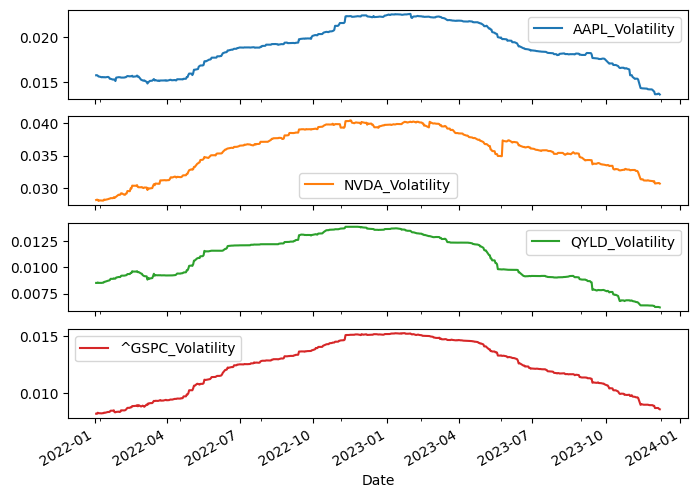

In [50]:
stocks_df[vols].plot(subplots=True,figsize=(8,6))

In [7]:
# rolling avgs
nvda['42d'] = np.round(nvda['Close'].rolling(42).mean(), 2)
nvda['252d'] = np.round(nvda['Close'].rolling(252).mean(), 2)

nvda[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2023-12-04,455.100006,456.68,341.13
2023-12-05,465.660004,457.13,342.31
2023-12-06,455.029999,457.07,343.46
2023-12-07,465.959991,457.38,344.67
2023-12-08,475.059998,457.79,345.92


<Axes: xlabel='Date'>

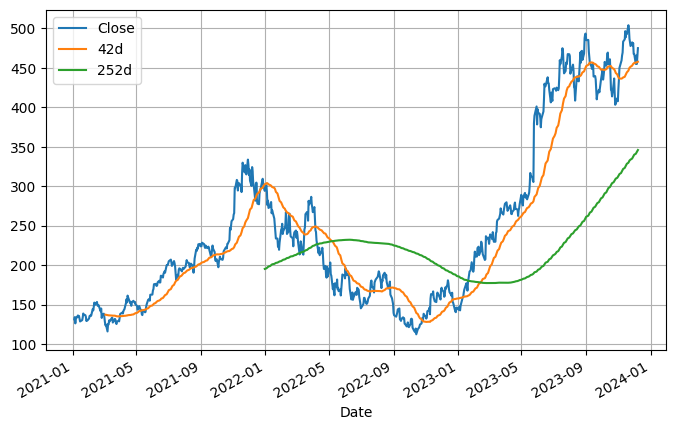

In [8]:
# rolling avgs fro a smaller window (42 days) and a larger window (252 days)
nvda[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

In [55]:
for stock in stocks:    
    stocks_df[stock + '_Return'] = np.log(stocks_df[stock] / stocks_df[stock].shift(1))

In [56]:
rets = [ret for ret in stocks_df.columns if '_Ret' in ret]

<Axes: xlabel='Date'>

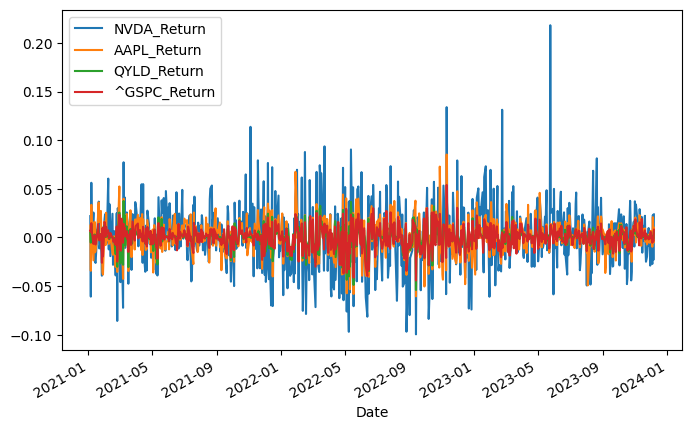

In [58]:
stocks_df[rets].plot(figsize=(8, 5))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

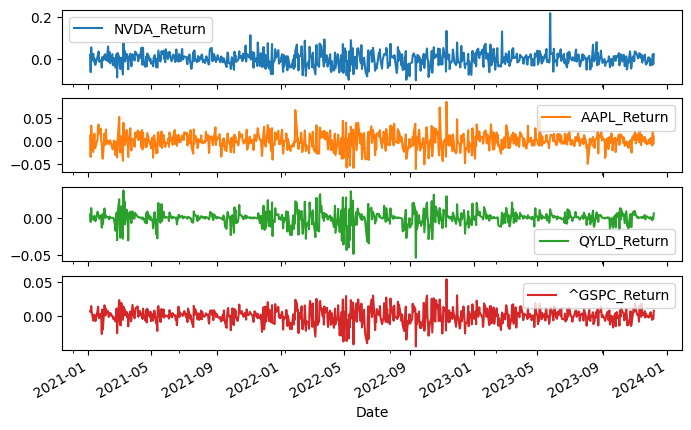

In [57]:
stocks_df[rets].plot(subplots=True, figsize=(8, 5))

In [ ]:
# next time
### condense all metrics into the visual below, 1 for each stock

In [11]:
# moving volatility
import math
nvda['Mov_Vol'] = nvda['Return'].rolling(252).std() * math.sqrt(252)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

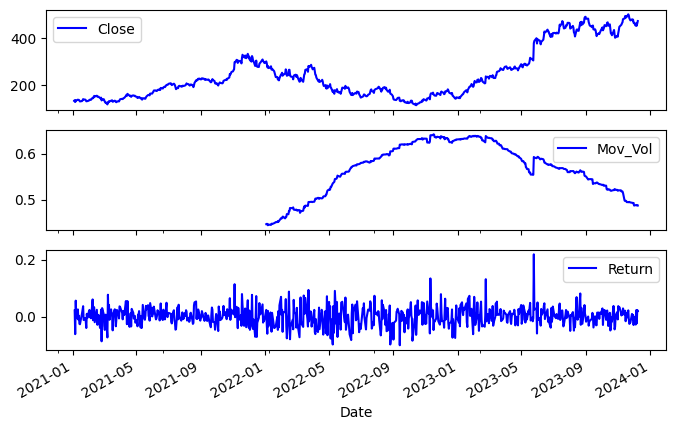

In [12]:
nvda[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b', figsize=(8,5))

##### Editing Notes:
- delete redundant code
- condense all the code cells into this specific visual
- do this for other stock choices: AAPL, QYLD, SP500
- then move on to linear regression models to look at how each one might effect the other

# Bibliography
Hilpisch, Yves. <i>Python for Finance</i>. O'Reilly Media, Inc. December 2014.

###